## TTM4110 - Lab 2


In [1]:
import os
from typing import Any

import numpy as np
from matplotlib import pyplot as plt
from numpy import floating
from numpy.random import default_rng
from numpy.typing import NDArray
from scipy import stats

from source.passenger import Passenger
from source.route_utils import Metric
from simulation_advanced import run_simulation as run_simulation_advanced
from simulation_simple import run_simulation as run_simulation_simple

In [2]:
%load_ext autoreload
%autoreload 2

SEED = 69_420
rng = default_rng(SEED)

plt.rcParams["grid.linestyle"] = "--"
plt.rcParams["grid.alpha"] = 0.7

In [3]:
def get_filepath(name: str) -> str:
    return os.path.join("img", name)

### II.A.1


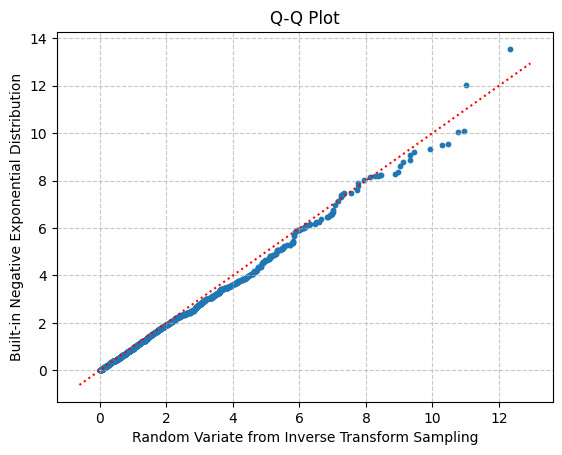

In [4]:
def neg_exp_ppf(beta: float, size: int) -> NDArray[Any]:
    return -np.log(rng.uniform(size=size)) * beta


beta = 2
size = 1_000
x = sorted(neg_exp_ppf(beta, size))
y = sorted(stats.expon.rvs(scale=beta, size=size, random_state=rng))

plt.scatter(x, y, s=10)
interval = plt.xlim()
plt.plot(interval, interval, color="red", ls=":")
plt.title("Q-Q Plot")
plt.xlabel("Random Variate from Inverse Transform Sampling")
plt.ylabel("Built-in Negative Exponential Distribution")
plt.grid(True)
plt.savefig(get_filepath("qqplot.png"))
plt.show()

## II.A.3


In [5]:
n = 15
cap = 20
buses = 10
q = 0.3
bus_utilisation: list[list[float]] = [[] for _ in range(buses)]

run_simulation_simple(cap, q, bus_utilisation)

Bus 0 has 0 passengers at 0.
Bus 1 has 0 passengers at 0.
Bus 2 has 0 passengers at 0.
Bus 3 has 0 passengers at 0.
Bus 4 has 0 passengers at 0.
Bus 5 has 0 passengers at 0.
Bus 6 has 0 passengers at 0.
Bus 7 has 0 passengers at 0.
Bus 8 has 0 passengers at 0.
Bus 9 has 0 passengers at 0.
Passenger arrived at 3w at 0.09551064313609155.
Passenger arrived at 3e at 0.19767129428934674.
Passenger arrived at 2w at 0.3027005323458314.
Passenger arrived at 1e at 0.4650209235432781.
Passenger arrived at 5e at 0.9647697358913636.
Passenger arrived at 5e at 1.1642323178831955.
Passenger arrived at 7w at 1.2253111592198132.
Passenger arrived at 4w at 1.2618871668190828.
Passenger arrived at 1w at 1.6858179101444857.
Passenger arrived at 7e at 1.8858077450781012.
Passenger arrived at 5e at 1.9764243555595886.
Passenger arrived at 3w at 2.0765653514633784.
Passenger arrived at 3e at 2.086781317925627.
Passenger arrived at 5w at 2.2341212391618743.
Passenger arrived at 4w at 2.2609613138209816.
Pass

## II.A.4


In [6]:
util_measurements: dict[int, tuple[floating, floating]] = {}
nbs = (5, 7, 10, 15)

for nb in nbs:
    util_means: list[floating] = []
    util_stds: list[floating] = []

    for _ in range(n):
        bus_utilisation: list[list[float]] = [[] for _ in range(nb)]
        run_simulation_simple(cap, q, bus_utilisation, verbose=False)

        utils = [np.mean(bus) for bus in bus_utilisation]
        util_means.append(np.mean(utils))
        util_stds.append(np.std(utils, ddof=1))

    util_measurements[nb] = (np.mean(util_means), np.mean(util_stds))

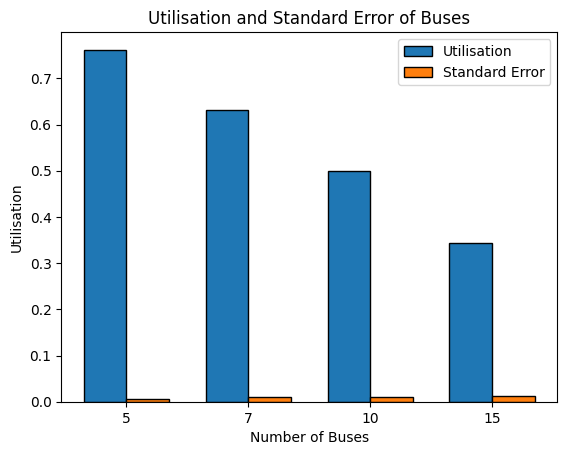

In [7]:
width = 0.35
x = np.arange(len(util_measurements))
utils = [mean for mean, _ in util_measurements.values()]
util_stes = [std / np.sqrt(n) for _, std in util_measurements.values()]

plt.bar(x - width / 2, utils, width, label="Utilisation", edgecolor="black")
plt.bar(
    x + width / 2,
    util_stes,
    width,
    label="Standard Error",
    edgecolor="black",
)
plt.xticks(x, util_measurements)
plt.title("Utilisation and Standard Error of Buses")
plt.xlabel("Number of Buses")
plt.ylabel("Utilisation")
plt.legend()
plt.savefig(get_filepath("utilisation_simple.png"))
plt.show()

## II.A.5


In [8]:
bus_utilisation: list[list[float]] = [[] for _ in range(buses)]
passengers: list[Passenger] = []
metric = Metric.MEAN_WAITING_TIME

run_simulation_advanced(cap, q, bus_utilisation, passengers, metric)

/Users/aleksandervestlund/.pyenv/versions/3.11.6/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/aleksandervestlund/.pyenv/versions/3.11.6/lib/python3.11/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


Bus 1 arrived at Stop 3e. There are 0 passengers in the bus. There are 0 passengers waiting at the stop.
Bus 1 left Stop 3e. There are 0 passengers in the bus.
Bus 4 arrived at Stop 3e. There are 0 passengers in the bus. There are 0 passengers waiting at the stop.
Bus 4 left Stop 3e. There are 0 passengers in the bus.
Bus 5 arrived at Stop 3e. There are 0 passengers in the bus. There are 0 passengers waiting at the stop.
Bus 5 left Stop 3e. There are 0 passengers in the bus.
Bus 8 arrived at Stop 3e. There are 0 passengers in the bus. There are 0 passengers waiting at the stop.
Bus 8 left Stop 3e. There are 0 passengers in the bus.
Bus 9 arrived at Stop 3e. There are 0 passengers in the bus. There are 0 passengers waiting at the stop.
Bus 9 left Stop 3e. There are 0 passengers in the bus.
Bus 3 arrived at Stop 7w. There are 0 passengers in the bus. There are 1 passengers waiting at the stop.
Passenger Agnieszka Z. entered Bus 3 at 3.
Bus 3 left Stop 7w. There are 1 passengers in the bu

In [9]:
util_measurements: dict[int, tuple[floating, floating]] = {}
travel_time_measurements: dict[int, tuple[floating, floating]] = {}

for nb in nbs:
    util_means: list[floating] = []
    util_stds: list[floating] = []
    tts_means: list[floating] = []
    tts_stds: list[floating] = []

    for _ in range(n):
        passengers: list[Passenger] = []
        bus_utilisation: list[list[float]] = [[] for _ in range(nb)]

        run_simulation_advanced(
            cap, q, bus_utilisation, passengers, metric, verbose=False
        )

        utils = [np.mean(bus) for bus in bus_utilisation]
        util_means.append(np.mean(utils))
        util_stds.append(np.std(utils, ddof=1))

        tts = [p.travel_time for p in passengers]
        tts_means.append(np.mean(tts))
        tts_stds.append(np.std(tts, ddof=1))

    util_measurements[nb] = (np.mean(util_means), np.mean(util_stds))
    travel_time_measurements[nb] = (np.mean(tts_means), np.mean(tts_stds))

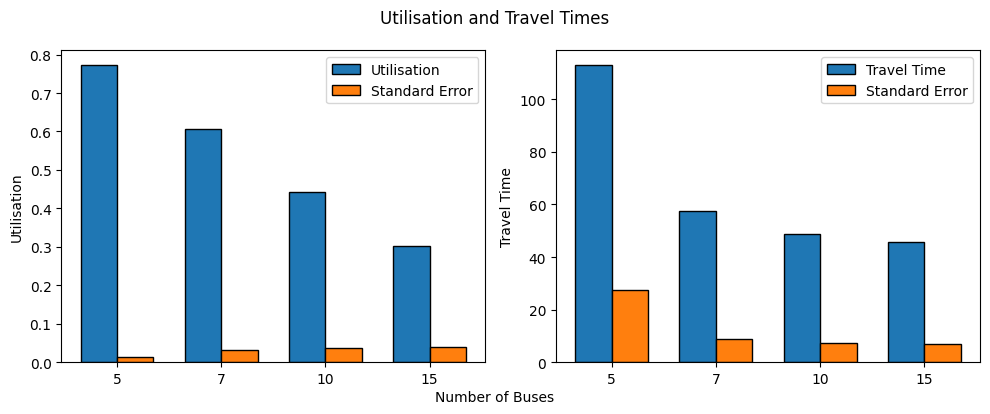

In [10]:
utils = [mean for mean, _ in util_measurements.values()]
util_stes = [std / np.sqrt(n) for _, std in util_measurements.values()]

travel_time_means = [mean for mean, _ in travel_time_measurements.values()]
travel_time_stes = [
    std / np.sqrt(n) for _, std in travel_time_measurements.values()
]

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))
fig.suptitle("Utilisation and Travel Times")
fig.text(0.5, 0, "Number of Buses", ha="center")

ax1.bar(x - width / 2, utils, width, label="Utilisation", edgecolor="black")
ax1.bar(
    x + width / 2,
    util_stes,
    width,
    label="Standard Error",
    edgecolor="black",
)
ax1.set_xticks(x, util_measurements)
ax1.set_ylabel("Utilisation")
ax1.legend()

ax2.bar(
    x - width / 2,
    travel_time_means,
    width,
    label="Travel Time",
    edgecolor="black",
)
ax2.bar(
    x + width / 2,
    travel_time_stes,
    width,
    label="Standard Error",
    edgecolor="black",
)
ax2.set_xticks(x, travel_time_measurements)
ax2.set_ylabel("Travel Time")
ax2.legend()
plt.tight_layout()
plt.savefig(get_filepath("utilisation_advanced.png"))
plt.show()

## II.B.1


/Users/aleksandervestlund/.pyenv/versions/3.11.6/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/aleksandervestlund/.pyenv/versions/3.11.6/lib/python3.11/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/Users/aleksandervestlund/.pyenv/versions/3.11.6/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/aleksandervestlund/.pyenv/versions/3.11.6/lib/python3.11/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/Users/aleksandervestlund/.pyenv/versions/3.11.6/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/U

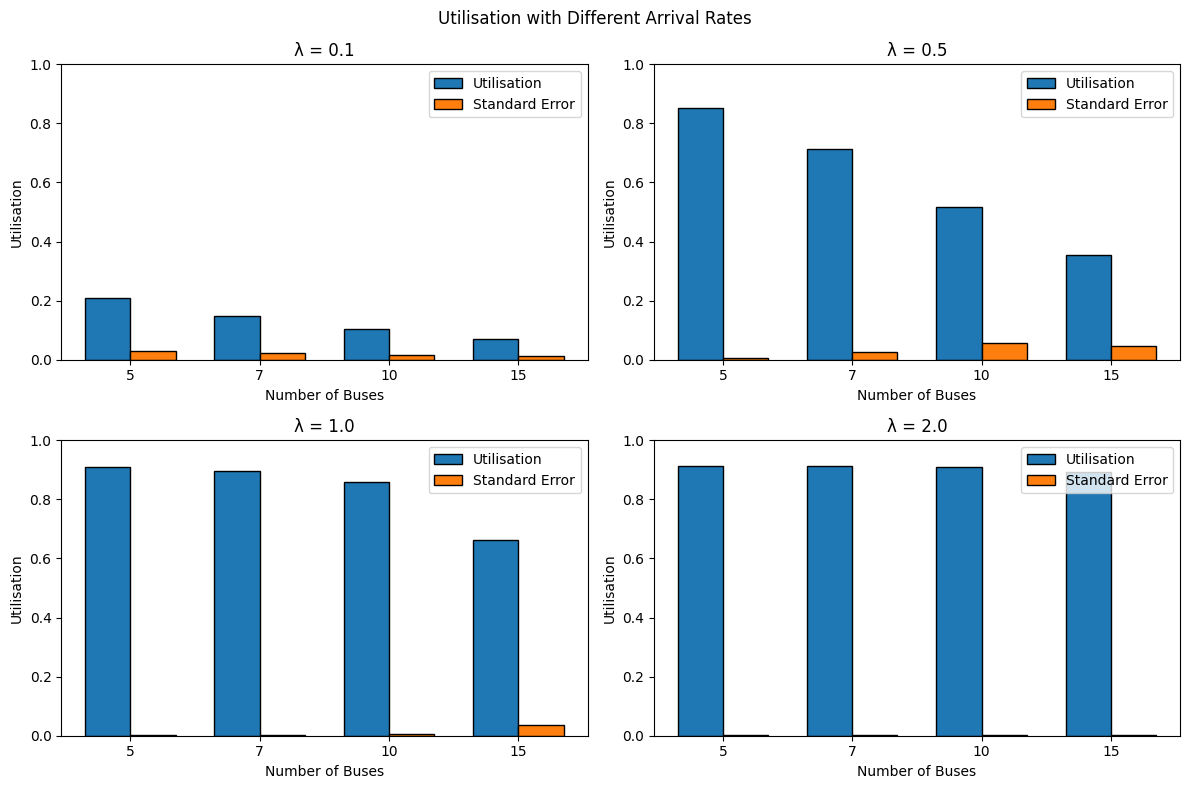

In [11]:
lambdas = (0.1, 0.5, 1.0, 2.0)

fig, axs = plt.subplots(2, 2, figsize=(12, 8))

for lamb, ax in zip(lambdas, axs.flat):
    rates = [lamb] * 14
    util_measurements: dict[int, tuple[floating, floating]] = {}

    for nb in nbs:
        util_means: list[floating] = []
        util_stds: list[floating] = []

        for _ in range(n):
            passengers: list[Passenger] = []
            bus_utilisation: list[list[float]] = [[] for _ in range(nb)]

            run_simulation_advanced(
                cap,
                q,
                bus_utilisation,
                passengers,
                metric,
                rates=rates,
                verbose=False,
            )

            utils = [np.mean(bus) for bus in bus_utilisation]
            util_means.append(np.mean(utils))
            util_stds.append(np.std(utils, ddof=1))

        util_measurements[nb] = (np.mean(util_means), np.mean(util_stds))

    utils = [mean for mean, _ in util_measurements.values()]
    util_stes = [std / np.sqrt(n) for _, std in util_measurements.values()]

    ax.bar(x - width / 2, utils, width, label="Utilisation", edgecolor="black")
    ax.bar(
        x + width / 2,
        util_stes,
        width,
        label="Standard Error",
        edgecolor="black",
    )
    ax.set_xticks(x, util_measurements)
    ax.set_ylim(0, 1)
    ax.set_title(f"λ = {lamb}")
    ax.set_ylabel("Utilisation")
    ax.set_xlabel("Number of Buses")
    ax.legend()

plt.suptitle("Utilisation with Different Arrival Rates")
plt.tight_layout()
plt.savefig(get_filepath("lambdas.png"))
plt.show()

## II.B.2


/Users/aleksandervestlund/.pyenv/versions/3.11.6/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/aleksandervestlund/.pyenv/versions/3.11.6/lib/python3.11/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


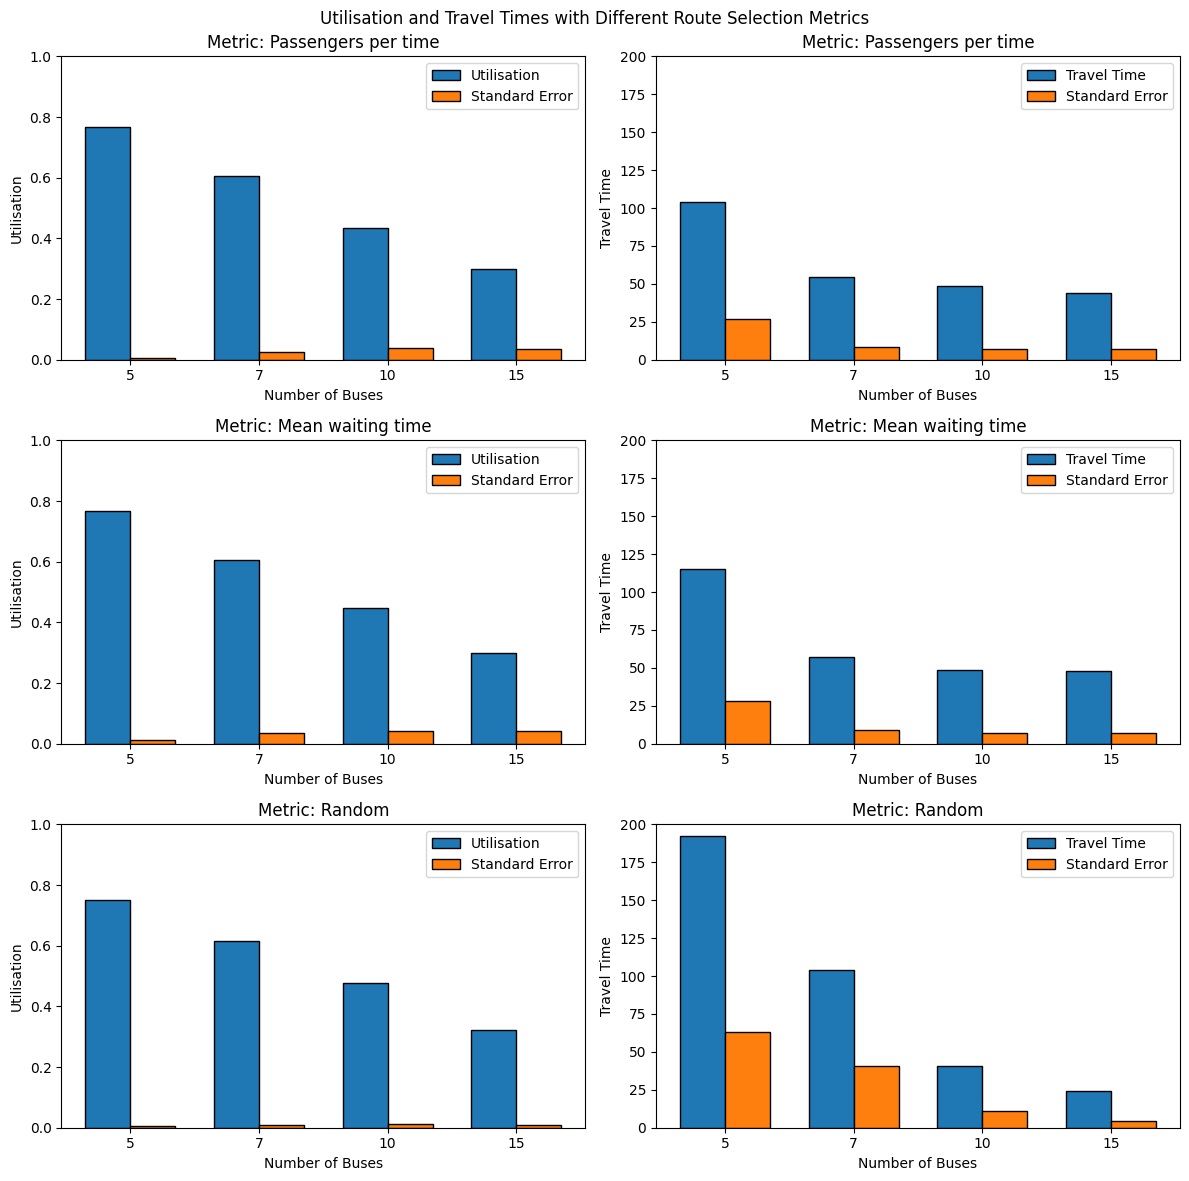

In [12]:
metrics = (Metric.PASSENGERS_PER_TIME, Metric.MEAN_WAITING_TIME, Metric.RANDOM)

fig, axs = plt.subplots(3, 2, figsize=(12, 12))

for metric, (ax1, ax2) in zip(metrics, axs):
    util_measurements: dict[int, tuple[floating, floating]] = {}
    travel_time_measurements: dict[int, tuple[floating, floating]] = {}

    for nb in nbs:
        util_means: list[floating] = []
        util_stds: list[floating] = []
        tts_means: list[floating] = []
        tts_stds: list[floating] = []

        for _ in range(n):
            passengers: list[Passenger] = []
            bus_utilisation: list[list[float]] = [[] for _ in range(nb)]

            run_simulation_advanced(
                cap,
                q,
                bus_utilisation,
                passengers,
                metric,
                verbose=False,
            )

            utils = [np.mean(bus) for bus in bus_utilisation]
            util_means.append(np.mean(utils))
            util_stds.append(np.std(utils, ddof=1))

            tts = [p.travel_time for p in passengers]
            tts_means.append(np.mean(tts))
            tts_stds.append(np.std(tts, ddof=1))

        util_measurements[nb] = (np.mean(util_means), np.mean(util_stds))
        travel_time_measurements[nb] = (np.mean(tts_means), np.mean(tts_stds))

    utils = [mean for mean, _ in util_measurements.values()]
    util_stes = [std / np.sqrt(n) for _, std in util_measurements.values()]

    travel_time_means = [mean for mean, _ in travel_time_measurements.values()]
    travel_time_stes = [
        std / np.sqrt(n) for _, std in travel_time_measurements.values()
    ]

    ax1.bar(
        x - width / 2, utils, width, label="Utilisation", edgecolor="black"
    )
    ax1.bar(
        x + width / 2,
        util_stes,
        width,
        label="Standard Error",
        edgecolor="black",
    )
    ax1.set_xticks(x, util_measurements)
    ax1.set_ylim(0, 1)
    ax1.set_title(f"Metric: {metric.value}")
    ax1.set_ylabel("Utilisation")
    ax1.set_xlabel("Number of Buses")
    ax1.legend()

    ax2.bar(
        x - width / 2,
        travel_time_means,
        width,
        label="Travel Time",
        edgecolor="black",
    )
    ax2.bar(
        x + width / 2,
        travel_time_stes,
        width,
        label="Standard Error",
        edgecolor="black",
    )
    ax2.set_xticks(x, travel_time_measurements)
    ax2.set_ylim(0, 200)
    ax2.set_title(f"Metric: {metric.value}")
    ax2.set_ylabel("Travel Time")
    ax2.set_xlabel("Number of Buses")
    ax2.legend()

plt.suptitle(
    "Utilisation and Travel Times with Different Route Selection Metrics"
)
plt.tight_layout()
plt.savefig(get_filepath("route_selection.png"))
plt.show()